In [0]:
#https://github.com/Hvass-Labs/TensorFlow-Tutorials
#https://www.kaggle.com/g7andpa/mnist-problem-using-tensorflow-by-mlp
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [0]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i], cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

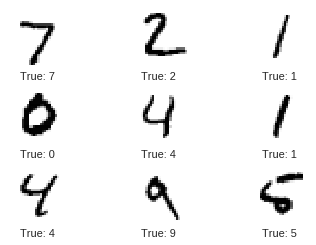

In [5]:
# Get the first images from the test-set.
images = x_test[0:9]

# Get the true classes for those images.
cls_true = y_test[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

In [6]:
x_train, x_test = x_train/255, x_test/255

num_classes = 10 #number of classes available, digits zero to nine
img_size_flat = x_train[0].flatten().shape[0]
print(img_size_flat)

x = tf.placeholder(tf.float32, [None, img_size_flat],name='x')
y_true = tf.placeholder(tf.float32, [None, 10])
y_true_cls = tf.placeholder(tf.int64, [None])
print(x)

784
Tensor("x:0", shape=(?, 784), dtype=float32)


In [0]:
weights = tf.Variable(tf.random_normal([img_size_flat, num_classes],stddev=0.01))
biases = tf.Variable(tf.random_normal([num_classes], stddev=0.01))
logits = tf.matmul(x,weights) + biases

In [0]:
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(logits, axis=1)

In [0]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y_true)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(cost)

In [0]:
#Performance Measures
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
batch_size = 100
session = tf.Session()
session.run(tf.global_variables_initializer())

In [0]:
#optimize the cost function
def optimize(num_iterations):
    for i in range(num_iterations):
        y_train1= tf.one_hot(y_train, 10)
        y_train1 = session.run(y_train1)
        x_train1 = x_train.reshape(x_train.shape[0],784)
        feed_dict_train = {x:x_train1, y_true:y_train1}
        session.run(optimizer, feed_dict=feed_dict_train)

In [0]:
y_test_cls=y_test
x_test = x_test.reshape(x_test.shape[0],784)
y_test1 = tf.one_hot(y_test, 10)
y_test1 = session.run(y_test1)
feed_dict_test = {x:x_test, y_true:y_test1, y_true_cls:y_test_cls}
def print_accuracy():
    acc = session.run(accuracy, feed_dict= feed_dict_test)
    print("Accuracy on test-set: {0:.1%}".format(acc))

In [0]:
def print_confusion_matrix():
    cls_true = y_test_cls
    cls_pred = session_run(y_pred_cls, feed_dict=feed_dict_test)
    cm = confusion_matrix(y_true=cls_true, y_pred=cls_pred)
    print(cm)
    
    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [15]:
print_accuracy()

Accuracy on test-set: 11.0%


In [16]:
optimize(num_iterations=2000)
print_accuracy()

Accuracy on test-set: 91.0%
